Calculation of number of $\nu_\mu$ CC interactions expected in the ATLAS Tile Cal (part of Hcal)

In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import nuflux
import SNeATLAS

### Functions to access NuFlux data and cross sections

In [12]:
def get_flux(energy, zenith, nu_types=[nuflux.NuMu]):
    flux = nuflux.makeFlux('H3a_SIBYLL23C')
    nu_energy=energy # in GeV
    nu_cos_zenith = np.cos(zenith)
    
    cumu_flux = 0
    for particle in nu_types: 
        cumu_flux = cumu_flux + flux.getFlux(particle,nu_energy,nu_cos_zenith)
        
    return cumu_flux

def get_flux_cosZenithAvged(energy, nu_types=[nuflux.NuMu]):
    zenith_range = np.arange(0,np.pi,0.01)
    return np.mean(get_flux(energy,zenith_range, nu_types))

In [13]:
cross_section_spectrum_array = np.loadtxt("nu_cross_sections/nu_mu_Fe56_cc_tot.txt", dtype=float)
cross_section_spectrum_array_anti = np.loadtxt("nu_cross_sections/nu_mu_bar_Fe56_cc_tot.txt", dtype=float)
def get_cs(energy):
    return np.interp(energy, cross_section_spectrum_array[:,0], cross_section_spectrum_array[:,1]*1e-38)
def get_cs_bar(energy):
    return np.interp(energy, cross_section_spectrum_array_anti[:,0], cross_section_spectrum_array_anti[:,1]*1e-38)

### Some random fixed values specific to ATLAS

In [14]:
# set fixed parameters
m_Hcal = 4e6 # assume iron??!?!?
m_nucleon = 1.67e-27
n_nucleons_in_Hcal = m_Hcal / m_nucleon
n_Fe56_in_Hcal = m_Hcal / (56*m_nucleon)

time = 500 * 86400 #500 days, in seconds

In [15]:
time

43200000

# Starting Events

In [43]:
universal_energyarray = np.logspace(np.log10(100), np.log10(1e7), 1000)
universal_energyarray = np.logspace(np.log10(1.5), np.log10(1e7), 10000)

In [50]:
universal_energyarray

array([1.50000000e+00, 1.50235898e+00, 1.50472168e+00, ...,
       9.96862093e+06, 9.98429814e+06, 1.00000000e+07])

### Calculate Starting Signal 

In [29]:
SNe_2P_D0_1_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs20.dat')
SNe_2P_D0_01_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs20.dat')

galaxy_dist_array = np.logspace(np.log10(1e-2), np.log10(25), 10) #(3.086e+21 is number of cm in a kiloparsec)
eventnum_array = np.asarray([])
for dist in galaxy_dist_array: 
    eventnum_array = np.append(eventnum_array, SNe_2P_D0_1_s20.get_eventNumber_intLogLogSpace(dist*3.086e+21, [1e2, 1e7]))

timewindow = SNe_2P_D0_1_s20.get_CRtimeWindow()

/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


### Calculate Starting Background

In [18]:
fluxes = np.asarray([])
for energy in universal_energyarray: 
    fluxes = np.append(fluxes, get_flux_cosZenithAvged(energy, nu_types=[nuflux.NuMu,
                                                                         nuflux.NuMuBar,
                                                                         nuflux.NuE,
                                                                         nuflux.NuEBar,
                                                                         nuflux.NuTau,
                                                                         nuflux.NuTauBar]))

ValueError: x and y must have same first dimension, but have shapes (10000,) and (1000,)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

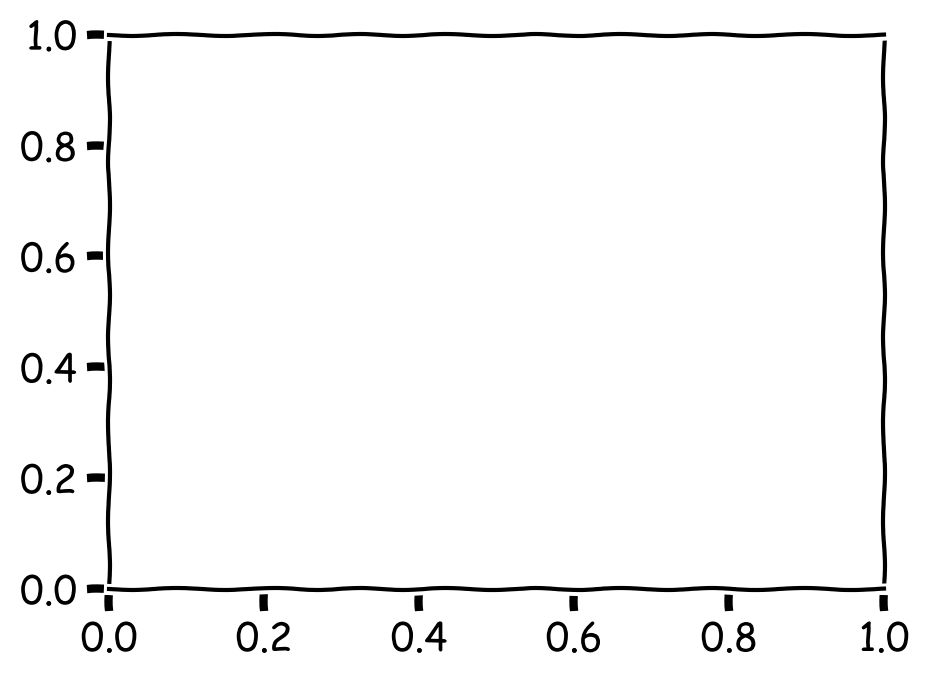

In [ ]:
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.plot(universal_energyarray, fluxes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'$\Phi_\nu \: [GeV^{-1} cm^{-2} sr^{-1} s^{-1}]$ ')
plt.title('Atmospheric NuFlux (all flavor)')

In [57]:
def dN(energy): 
    dN = get_cs(energy) * get_flux_cosZenithAvged(energy, nu_types=[nuflux.NuMu,nuflux.NuE,nuflux.NuTau])
    return dN

def dN_bar(energy):
    dN_bar = get_cs_bar(energy) * get_flux_cosZenithAvged(energy, nu_types=[nuflux.NuMuBar,nuflux.NuEBar,nuflux.NuTauBar])
    return dN_bar

dN_array = np.asarray([])
dN_bar_array = np.asarray([])

for energy in universal_energyarray:
    dN_array = np.append(dN_array, dN(energy))
    dN_bar_array = np.append(dN_bar_array, dN_bar(energy))

N_pred_tot = SNeATLAS.integrate_logspace(universal_energyarray, dN_array, 1e2, 1e7)[0] * 4*np.pi * (1e8) * n_Fe56_in_Hcal
N_pred_tot = N_pred_tot + SNeATLAS.integrate_logspace(universal_energyarray, dN_bar_array, 1e2, 1e7)[0] * 4*np.pi * (1e8) * n_Fe56_in_Hcal
N_pred_tot

4.52318412709797

In [30]:
betel_dist = 720 / 3261.564 
betel_events_D0_1 = SNe_2P_D0_1_s20.get_eventNumber_intLogLogSpace(betel_dist*3.086e+21, [1e2, 1e7])
betel_events_D0_01 = SNe_2P_D0_01_s20.get_eventNumber_intLogLogSpace(betel_dist*3.086e+21, [1e2, 1e7])

0.00022178096973829442

In [33]:
to = SNeATLAS.make_statTest([betel_events_D0_01],[N_pred_tot])
to.get_pValue()

0.00022178096973829442

In [27]:
betel_events

68.72734456125025

(0.01, 25)

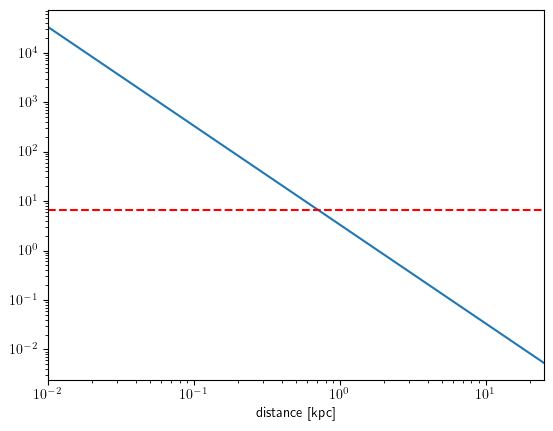

In [22]:
plt.plot(galaxy_dist_array, eventnum_array)
plt.axhline(y=N_pred_tot, color='r', linestyle='--')
plt.xscale('log');plt.yscale('log')
plt.xlabel('distance [kpc]')
plt.xlim(1e-2, 25)

In [55]:
to = SNeATLAS.make_statTest([1.4],[1e-3])
to.get_pValue()

0.0002912123498517438

In [44]:
solidangle = np.asarray([np.pi*(50e-6 / 30)**2, np.pi*(500e-6 / 30)**2])
N_bkg_tot = solidangle * 1/(4*np.pi) * N_pred_tot